<a href="https://colab.research.google.com/github/jdvallad/Math-152/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration 2 - The Random Walk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
steps = 1000

In [ ]:
def basic_walk() -> list:
    """
    Generates simple random walk.
    :return positions:
    """
    positions = [0]
    for i in range(steps):
        rand = np.random.randint(0, 2)
        if rand:
            positions.append(positions[-1] + 1)
        if not rand:
            positions.append(positions[-1] - 1)
    return positions

positions = basic_walk()
plt.plot(positions)
plt.xlabel("Step")
plt.ylabel("Position")
plt.title("Random Walk H/T")
plt.show()

In [9]:
print(f"Starting position: 0")
print(f"Last Position (step {steps}): {positions[-1]}")
print(f"Square root of {steps} steps: {np.sqrt(steps)}")

Starting position: 0
Last Position (step 1000): -20
Square root of 1000 steps: 31.622776601683793


For this walk, we consider 3 static points representing the corners of a triangle, and a random starting point for the walk. Then we iterate the following procedure: We first roll a 3 sided dice to figure out which vertex the point walks towards, each step going halfway between its current position and the vertex's position.

In [10]:
def points_walk(iters) -> list:
    # Initializing the positions
    positions = np.zeros((iters, 2))
    positions[0, :] = np.random.uniform(-1,1, 2)

    # Arrange n static points evenly spaced around a unit circle
    statics = np.vstack((np.cos(np.linspace(0,2*np.pi, 4))[::-1], np.sin(np.linspace(0,2*np.pi,4))[::-1])).T
    for i in range(1, iters):
        vertex = np.random.randint(0,3)
        positions[i, :] = (positions[i-1]+statics[vertex])/2
    return positions.T

Text(0.5, 1.0, '3 points walk')

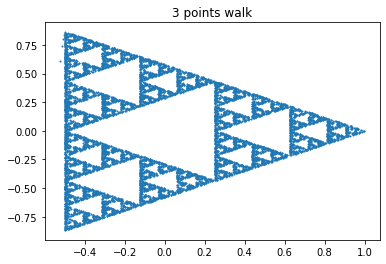

In [11]:
xvals, yvals = points_walk(iters=10000)
plt.scatter(xvals, yvals, s=1)
plt.title("3 points walk")

Planetary Walk

For this 2-dimensional walk, we will define a point to act as a planetary object that pulls our random walker towards it when it is far away, and pushes it away when it is too close. 

[[[  25.   25.]]

 [[  24.   26.]]

 [[  25.   25.]]

 ...

 [[ 842. -792.]]

 [[ 841. -791.]]

 [[ 842. -792.]]]
[[  25.   25.]
 [  24.   26.]
 [  25.   25.]
 ...
 [ 842. -792.]
 [ 841. -791.]
 [ 842. -792.]]


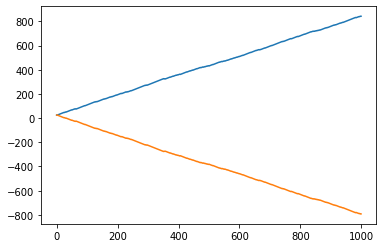

In [143]:
def distance(a,b):
    return np.sqrt((b[1] - a[1]) ** 2 + (b[0] - a[0]) ** 2)

def planetary_walk(tractors, walkers,steps = 1000):
    positions = np.zeros(shape = (steps,len(walkers),2))
    positions[0] = walkers[:]
    for i in range(1,steps):
        for j in range(len(walkers)):
            step_vector = np.array([0,0])
            for k in range(len(tractors)):
                step_vector += discretize_distance(tractors[k],walkers[j])
            positions[i][j] = positions[i-1][j] + step_vector
    return np.array(positions)

def discretize_distance(tractor,walker, threshold = 500):
    dist = distance(tractor, walker)
    if walker[1] - tractor[1] >= 0:
        yAttract = -1
    else:
        yAttract = 1
    if walker[0] - tractor[0] >= 0:
        xAttract = -1
    else:
        xAttract = 1
    if  np.random.rand() < g(dist,threshold):
        return np.array([-xAttract,yAttract])
    else:
        return np.array([xAttract,-yAttract])


def g(x, threshold):
    if x > threshold:
        return .9
    else:
        return .1
tractors = [[50,50]]
walkers = [[25,25]]
walk = planetary_walk(tractors,walkers)
print(walk)
print(walk[:,0])
plt.plot(walk[:,0])